This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_34631/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/alpha/docs/paranoia.md for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

# Global References

*Global References* creates a reference to a *macro* in a subtree that starts with a *frame* of a given type.

## *Internal* Global References

A reference to a macro in the same tree.

; üñã n1 ‚ûú Frame‚ù¨FrameSequence#1‚ù≠
; üñã n1.n2 ‚ûú Frame‚ù¨MacroArray#1‚ù≠
n3:
foo #5eec  ; üñã n1.n2.n3 ‚ûú Macro‚ù¨User#1‚ù≠
n4:
foo #ed40  ; üñã n1.n2.n4 ‚ûú Macro‚ù¨User#1‚ù≠
n5:
foo #a4d4  ; üñã n1.n2.n5 ‚ûú Macro‚ù¨User#1‚ù≠
foo #d2a0  ; üñã n1.n2.n6 ‚ûú Macro‚ù¨User#1‚ù≠
foo #7183  ; üñã n1.n2.n7 ‚ûú Macro‚ù¨User#1‚ù≠
; üñã n1.n8 ‚ûú Frame‚ù¨MacroArray#2‚ù≠
global_ref: n4  ; üñã n1.n8.n9 ‚ûú Macro‚ù¨User#3‚ù≠
global_ref: n5  ; üñã n1.n8.n10 ‚ûú Macro‚ù¨User#3‚ù≠
global_ref: n3  ; üñã n1.n8.n11 ‚ûú Macro‚ù¨User#3‚ù≠


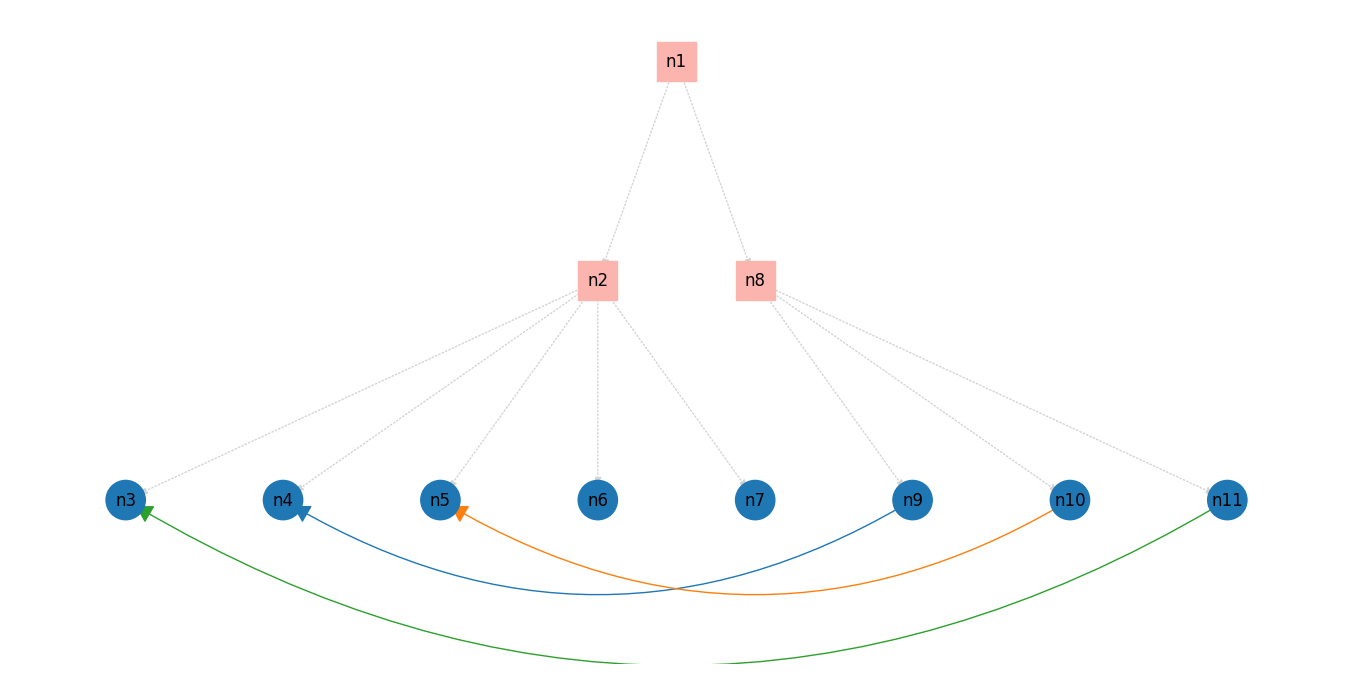

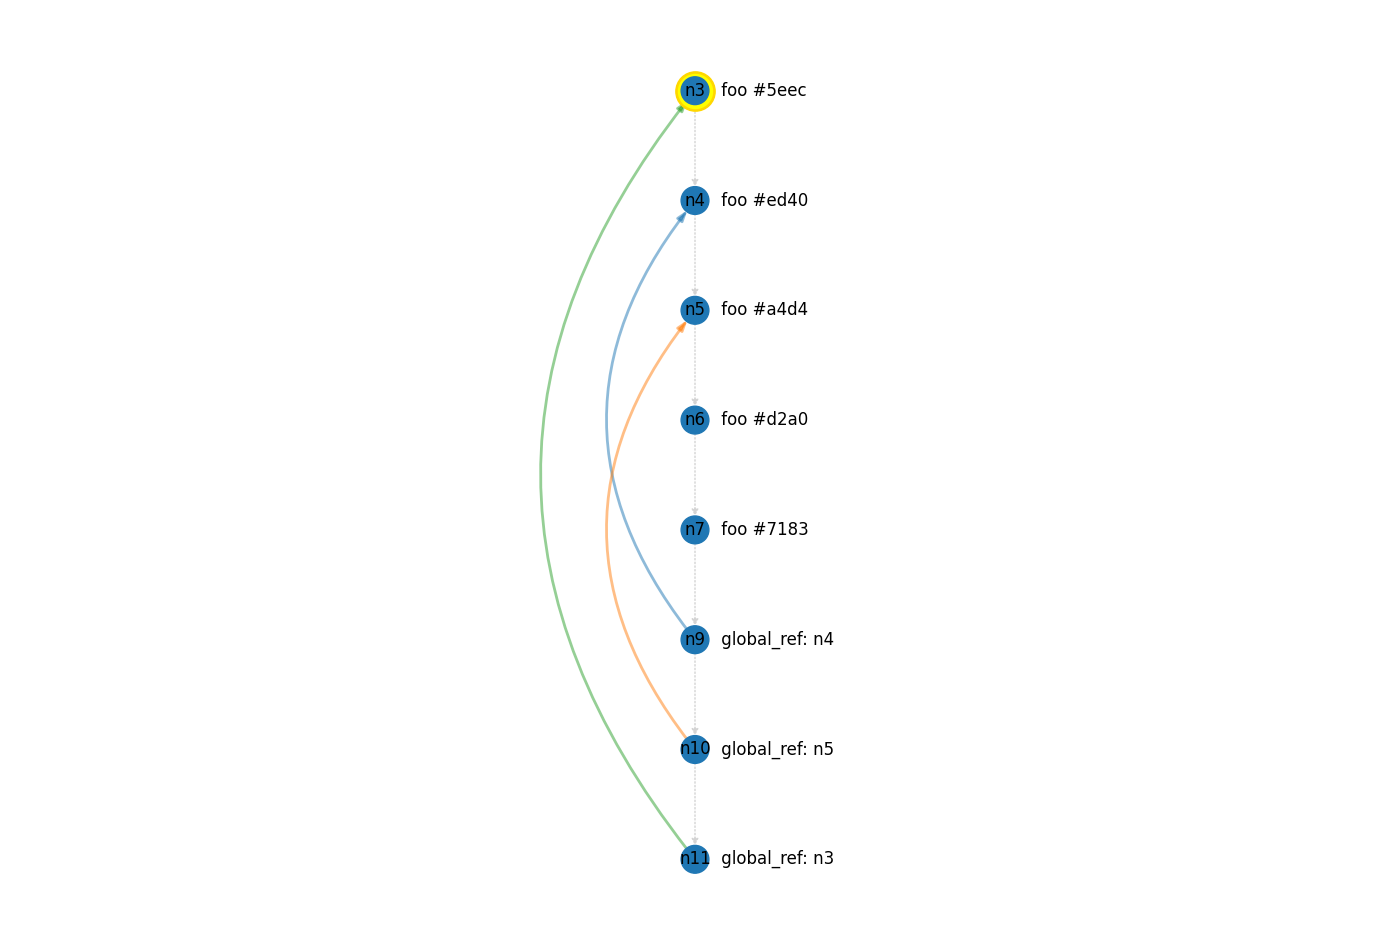

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))

foo_bunch = byron.f.bunch([macro_foo], size=5)
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference(foo_bunch))
ref_bunch = byron.f.bunch([macro_ref], size=3)
program = byron.f.sequence([foo_bunch, ref_bunch])

byron.f.as_text(program)
byron.f.as_forest(program)
byron.f.as_lgp(program)

References may use the `frame` class or the name of a *frame class* (see *string magic* with frames). Remember that all names are **unique** (thus they me defined only once).

In [3]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference('foo_bunch_name'))

foo_bunch = byron.f.bunch([macro_foo], size=5, name='foo_bunch_name')
ref_bunch = byron.f.bunch([macro_ref], size=3)
program = byron.f.sequence([foo_bunch, ref_bunch])

byron.f.as_text(program)

; üñã n1 ‚ûú Frame‚ù¨FrameSequence#2‚ù≠
; üñã n1.n2 ‚ûú Frame‚ù∞foo_bunch_name‚ù±
n3:
foo #5eec  ; üñã n1.n2.n3 ‚ûú Macro‚ù¨User#1‚ù≠
n4:
foo #ed40  ; üñã n1.n2.n4 ‚ûú Macro‚ù¨User#1‚ù≠
n5:
foo #a4d4  ; üñã n1.n2.n5 ‚ûú Macro‚ù¨User#1‚ù≠
foo #d2a0  ; üñã n1.n2.n6 ‚ûú Macro‚ù¨User#1‚ù≠
foo #7183  ; üñã n1.n2.n7 ‚ûú Macro‚ù¨User#1‚ù≠
; üñã n1.n8 ‚ûú Frame‚ù¨MacroArray#3‚ù≠
global_ref: n4  ; üñã n1.n8.n9 ‚ûú Macro‚ù¨User#4‚ù≠
global_ref: n5  ; üñã n1.n8.n10 ‚ûú Macro‚ù¨User#4‚ù≠
global_ref: n3  ; üñã n1.n8.n11 ‚ûú Macro‚ù¨User#4‚ù≠


## *External* Global References

A reference to a different frame in a different tree. The `global_reference` must be allowed to create new frames. The *creative_zeal* $z$ defines the willingness to create new trees: if $z$ is an integer, then the probability to create the target $T_{n+1}$ if $n$ compatible targets $T_0, T_1, ..., T_n$ already exist is $p=1-\frac{n}{n+z}$; if $z$ is a float, then the probability is simply $p = z$. If $p > 0$ and $n=0$ then the first tree is always created. 

; üñã n1 ‚ûú Frame‚ù¨MacroArray#5‚ù≠
foo #c2da  ; üñã n1.n2 ‚ûú Macro‚ù¨User#1‚ù≠
GOTO n8  ; üñã n1.n3 ‚ûú Macro‚ù¨User#5‚ù≠
GOTO n10  ; üñã n1.n4 ‚ûú Macro‚ù¨User#5‚ù≠
foo #1056  ; üñã n1.n5 ‚ûú Macro‚ù¨User#1‚ù≠
GOTO n10  ; üñã n1.n6 ‚ûú Macro‚ù¨User#5‚ù≠
; üñã n7 ‚ûú Frame‚ù¨MacroArray#4‚ù≠
n8:
bar +0.29  ; üñã n7.n8 ‚ûú Macro‚ù¨User#2‚ù≠
bar +0.65  ; üñã n7.n9 ‚ûú Macro‚ù¨User#2‚ù≠
n10:
bar -0.11  ; üñã n7.n10 ‚ûú Macro‚ù¨User#2‚ù≠


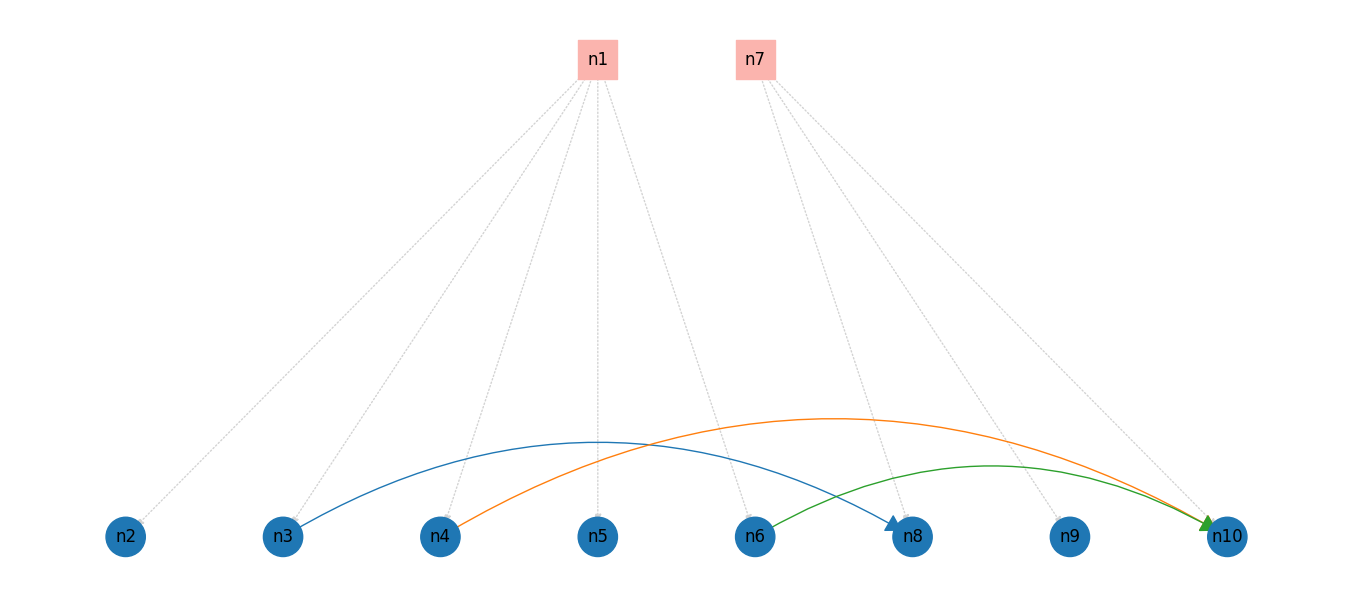

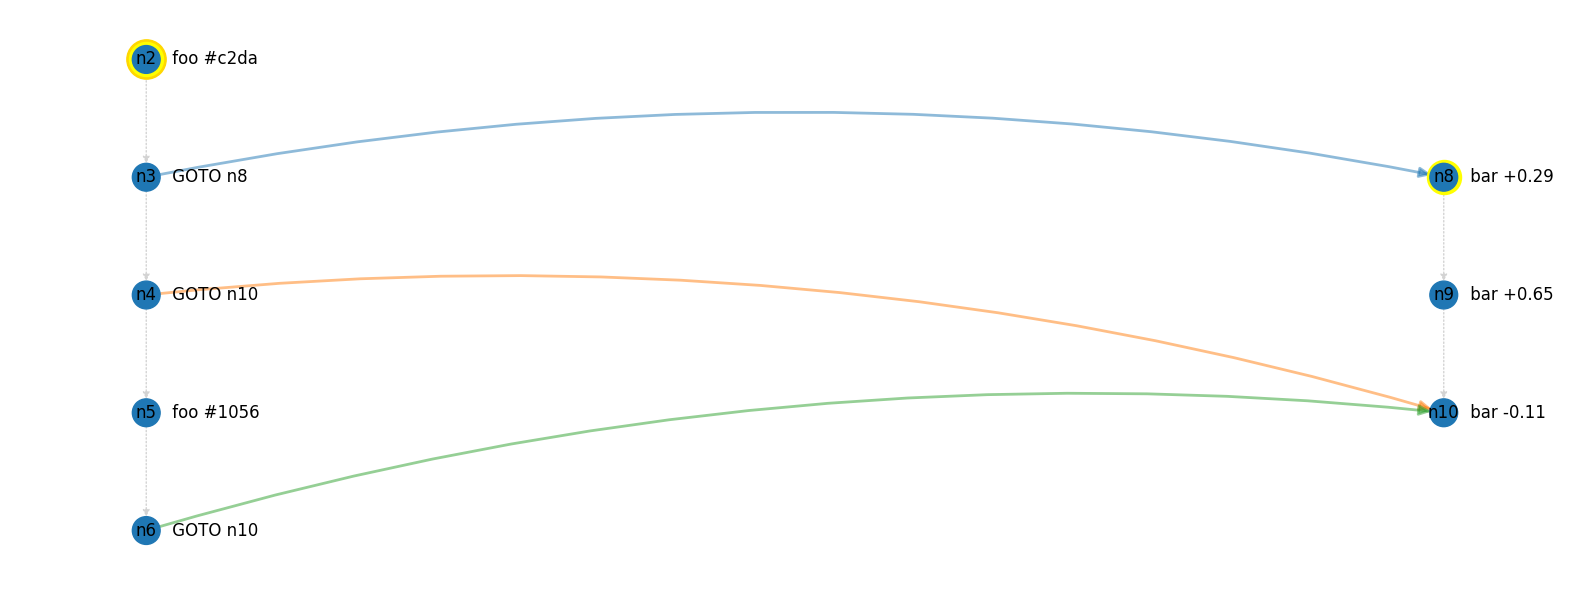

In [4]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('GOTO {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

Global references may be forced to always hit the very first maco in a frame

; üñã n1 ‚ûú Frame‚ù¨MacroArray#7‚ù≠
foo #c2da  ; üñã n1.n2 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n8  ; üñã n1.n3 ‚ûú Macro‚ù¨User#6‚ù≠
CALL n12  ; üñã n1.n4 ‚ûú Macro‚ù¨User#6‚ù≠
foo #31d3  ; üñã n1.n5 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n12  ; üñã n1.n6 ‚ûú Macro‚ù¨User#6‚ù≠
; üñã n7 ‚ûú Frame‚ù¨MacroArray#6‚ù≠
n8:
bar +0.29  ; üñã n7.n8 ‚ûú Macro‚ù¨User#2‚ù≠
bar +0.65  ; üñã n7.n9 ‚ûú Macro‚ù¨User#2‚ù≠
bar -0.11  ; üñã n7.n10 ‚ûú Macro‚ù¨User#2‚ù≠
; üñã n11 ‚ûú Frame‚ù¨MacroArray#6‚ù≠
n12:
bar -0.29  ; üñã n11.n12 ‚ûú Macro‚ù¨User#2‚ù≠
bar +0.94  ; üñã n11.n13 ‚ûú Macro‚ù¨User#2‚ù≠
bar +0.79  ; üñã n11.n14 ‚ûú Macro‚ù¨User#2‚ù≠


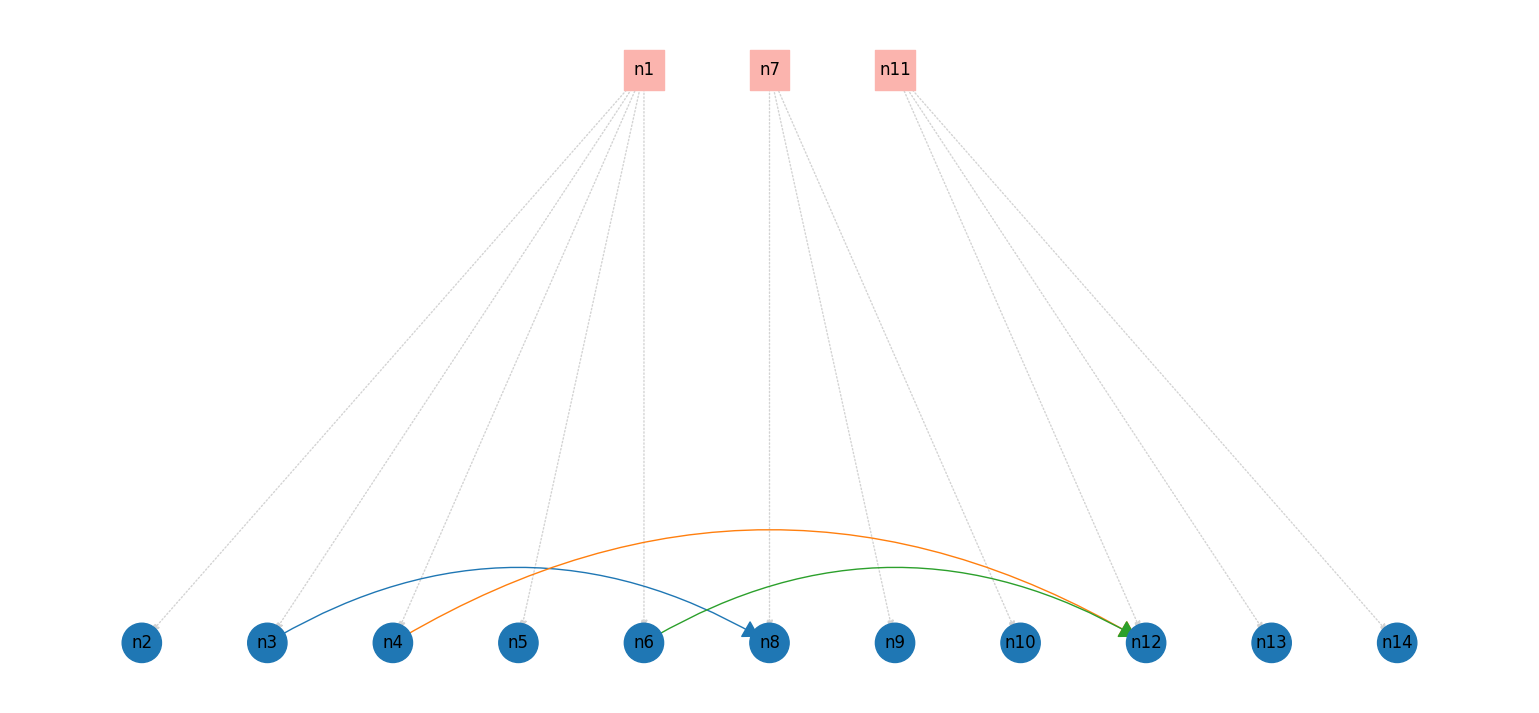

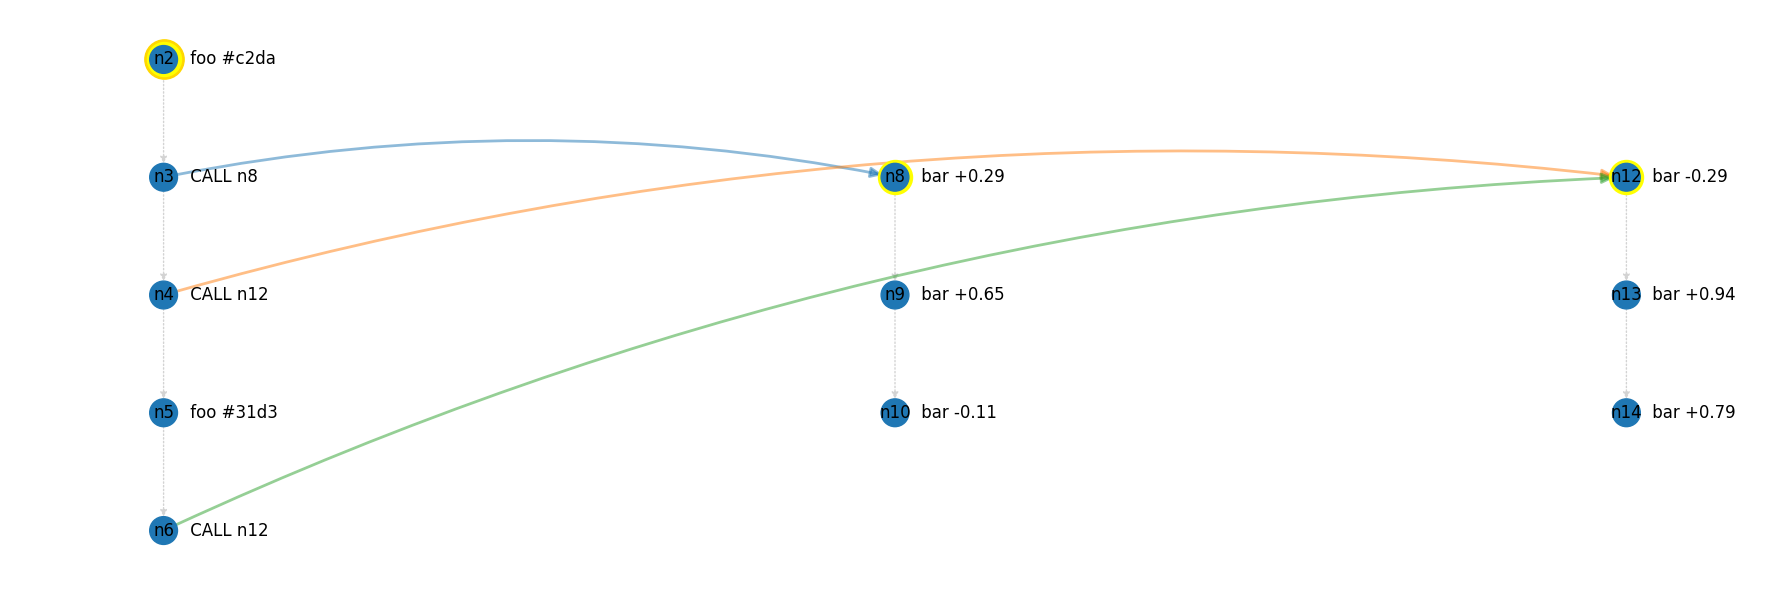

In [5]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

Labels may be tweaked in different ways

In [6]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1), _label='PROC {_node}:\n')
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)

; üñã n1 ‚ûú Frame‚ù¨MacroArray#9‚ù≠
foo #c2da  ; üñã n1.n2 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n8  ; üñã n1.n3 ‚ûú Macro‚ù¨User#8‚ù≠
CALL n12  ; üñã n1.n4 ‚ûú Macro‚ù¨User#8‚ù≠
foo #31d3  ; üñã n1.n5 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n12  ; üñã n1.n6 ‚ûú Macro‚ù¨User#8‚ù≠
; üñã n7 ‚ûú Frame‚ù¨MacroArray#8‚ù≠
PROC n8:
bar +0.29  ; üñã n7.n8 ‚ûú Macro‚ù¨User#7‚ù≠
bar +0.65  ; üñã n7.n9 ‚ûú Macro‚ù¨User#7‚ù≠
bar -0.11  ; üñã n7.n10 ‚ûú Macro‚ù¨User#7‚ù≠
; üñã n11 ‚ûú Frame‚ù¨MacroArray#8‚ù≠
PROC n12:
bar -0.29  ; üñã n11.n12 ‚ûú Macro‚ù¨User#7‚ù≠
bar +0.94  ; üñã n11.n13 ‚ûú Macro‚ù¨User#7‚ù≠
bar +0.79  ; üñã n11.n14 ‚ûú Macro‚ù¨User#7‚ù≠


However, forcing a custom `_label` in *macro_bar* would use it everywhere a macro_bar is used. It is better to create a special macro just for the first line and customize it.

; üñã n1 ‚ûú Frame‚ù¨MacroArray#11‚ù≠
bar +0.57  ; üñã n1.n2 ‚ûú Macro‚ù¨User#2‚ù≠
CALL n9  ; üñã n1.n3 ‚ûú Macro‚ù¨User#9‚ù≠
bar -0.87  ; üñã n1.n4 ‚ûú Macro‚ù¨User#2‚ù≠
foo #d3df  ; üñã n1.n5 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n9  ; üñã n1.n6 ‚ûú Macro‚ù¨User#9‚ù≠
bar -0.69  ; üñã n1.n7 ‚ûú Macro‚ù¨User#2‚ù≠
; üñã n8 ‚ûú Frame‚ù¨FrameSequence#3‚ù≠
PROC n9:
; ini n9  ; üñã n8.n9 ‚ûú Macro‚ù¨Text#1‚ù≠
; üñã n8.n10 ‚ûú Frame‚ù¨MacroArray#10‚ù≠
foo #d2a0  ; üñã n8.n10.n11 ‚ûú Macro‚ù¨User#1‚ù≠
bar -0.11  ; üñã n8.n10.n12 ‚ûú Macro‚ù¨User#2‚ù≠
bar -0.55  ; üñã n8.n10.n13 ‚ûú Macro‚ù¨User#2‚ù≠


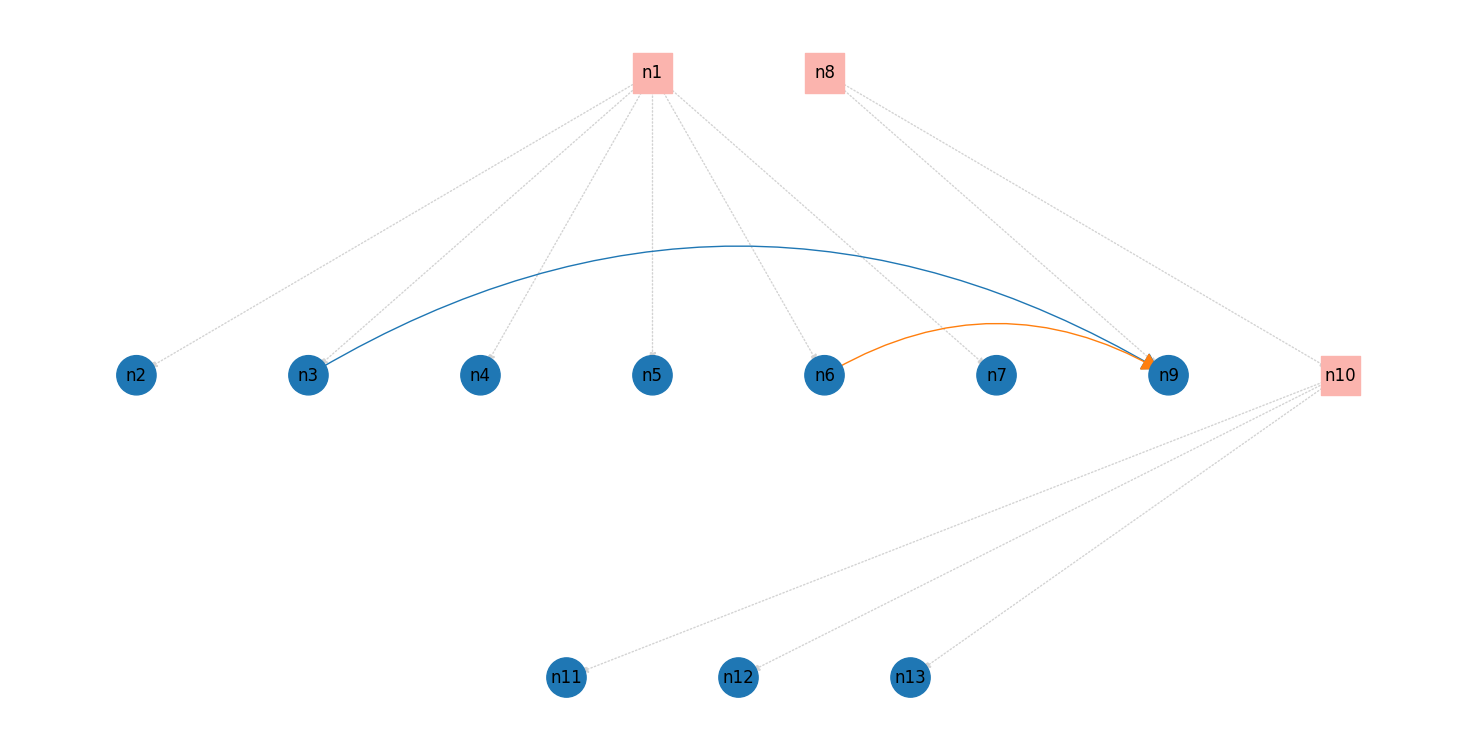

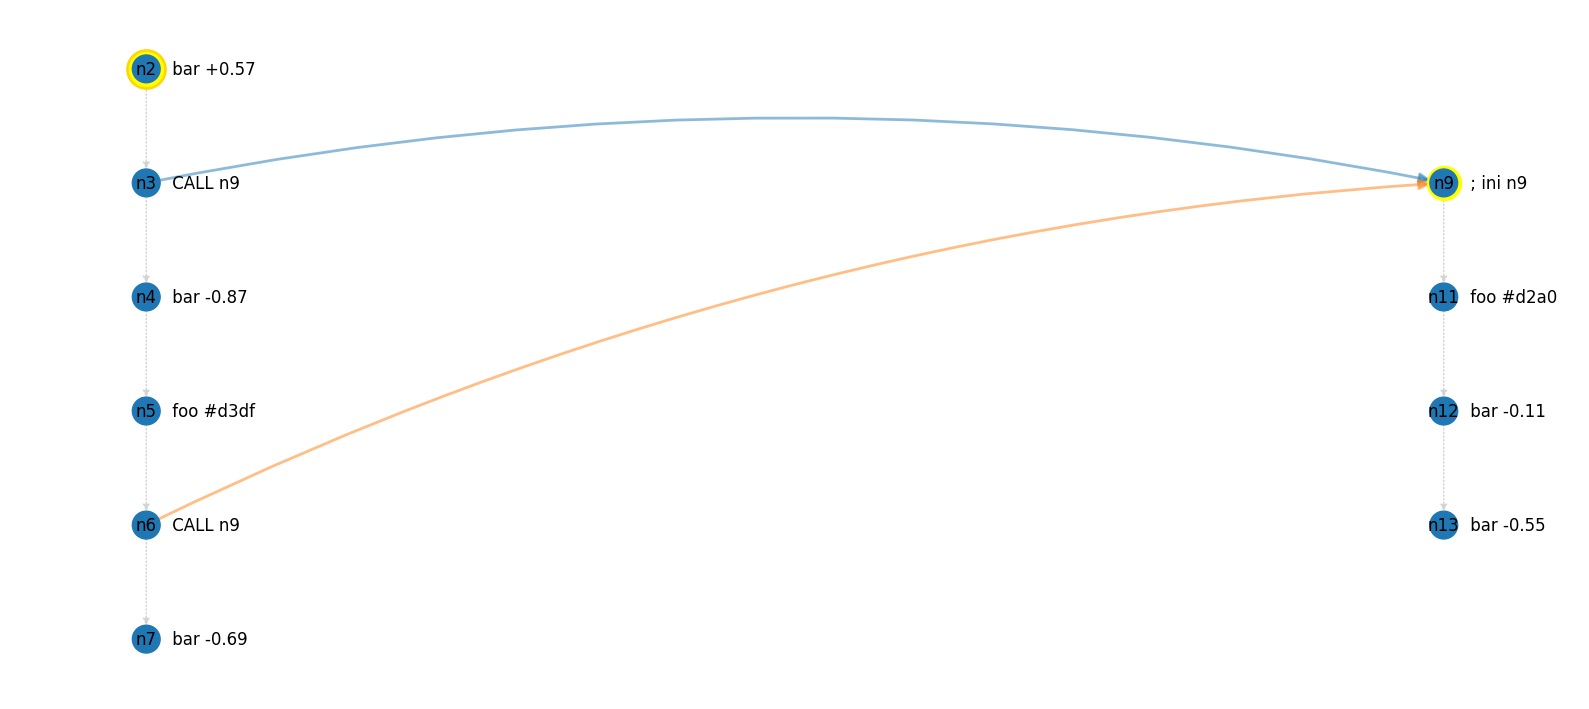

In [7]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
sub_header = byron.f.macro('; ini {_node}', _label='PROC {_node}:\n')
subroutines = byron.f.sequence([sub_header, byron.f.bunch([macro_foo, macro_bar], size=3)])
macro_call = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(subroutines, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_bar, macro_call], weights=(2, 2, 1), size=6)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

By default external frames are dumped after the main one, burt the order may be tweaked. In the example, using *force_parent*, `n10` (the beginning of the tree containing subroutines, *Frame‚ù¨FrameSequence#4‚ù≠*) is dumped after `n2` (the placeholder, *Macro‚ù¨Text#2‚ù≠*)

; üñã n1 ‚ûú Frame‚ù¨FrameSequence#5‚ù≠
; üñã n1.n2 ‚ûú Macro‚ù¨Text#2‚ù≠
; üñã n10 ‚ûú Frame‚ù¨FrameSequence#4‚ù≠
PROC n11:
; init n11  ; üñã n10.n11 ‚ûú Macro‚ù¨Text#3‚ù≠
; üñã n10.n12 ‚ûú Frame‚ù¨MacroArray#12‚ù≠
foo #d2a0  ; üñã n10.n12.n13 ‚ûú Macro‚ù¨User#1‚ù≠
bar -0.11  ; üñã n10.n12.n14 ‚ûú Macro‚ù¨User#2‚ù≠
bar -0.55  ; üñã n10.n12.n15 ‚ûú Macro‚ù¨User#2‚ù≠
; üñã n1.n3 ‚ûú Frame‚ù¨MacroArray#13‚ù≠
bar +0.57  ; üñã n1.n3.n4 ‚ûú Macro‚ù¨User#2‚ù≠
CALL n11  ; üñã n1.n3.n5 ‚ûú Macro‚ù¨User#10‚ù≠
CALL n11  ; üñã n1.n3.n6 ‚ûú Macro‚ù¨User#10‚ù≠
foo #d3df  ; üñã n1.n3.n7 ‚ûú Macro‚ù¨User#1‚ù≠
CALL n11  ; üñã n1.n3.n8 ‚ûú Macro‚ù¨User#10‚ù≠
CALL n11  ; üñã n1.n3.n9 ‚ûú Macro‚ù¨User#10‚ù≠


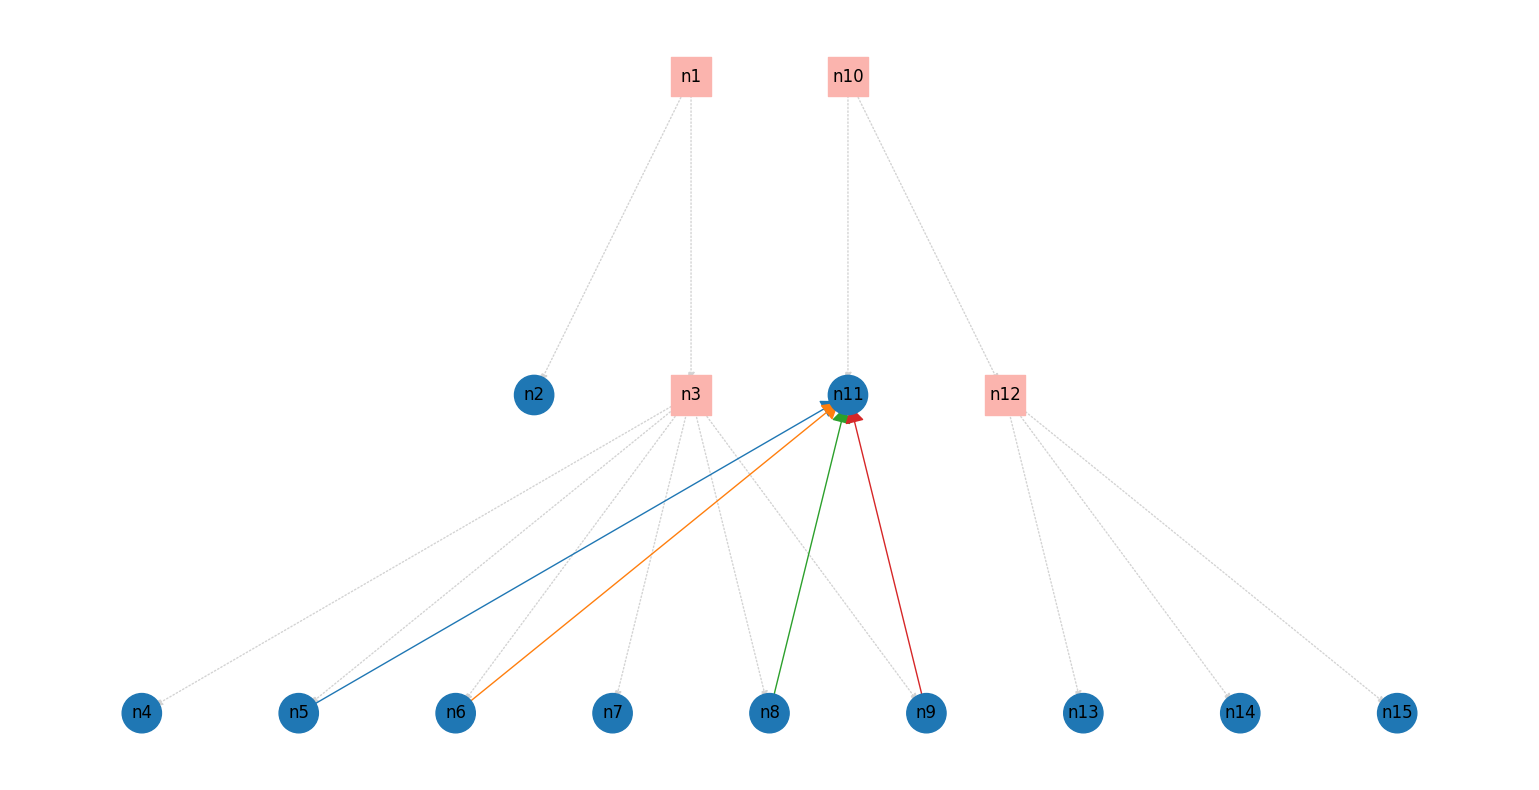

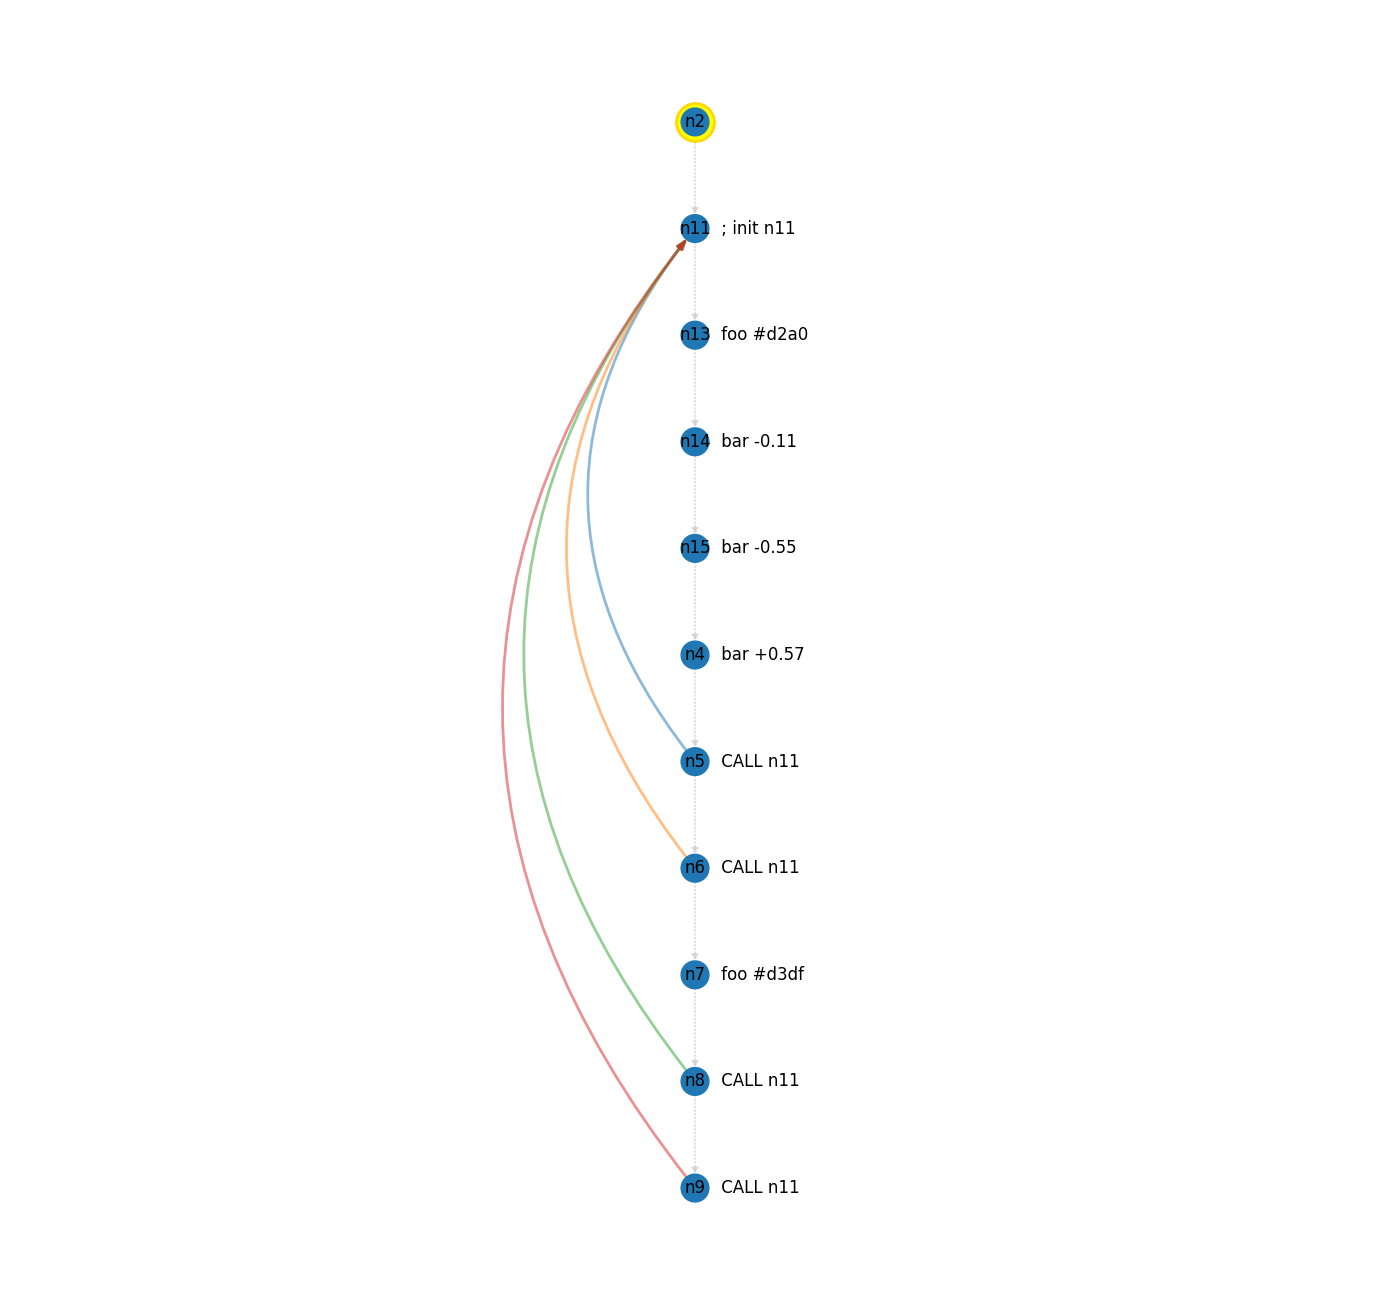

In [8]:
placeholder = byron.f.macro('')
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
sub_header = byron.f.macro('; init {_node}', _label='PROC {_node}:\n')
subroutines = byron.f.sequence([sub_header, byron.f.bunch([macro_foo, macro_bar], size=3)])
macro_call = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(subroutines, creative_zeal=1, first_macro=True))
main_frame = byron.f.sequence(
    [placeholder, byron.f.bunch([macro_foo, macro_bar, macro_call], weights=(1, 1, 1), size=6)]
)
subroutines.force_parent(placeholder)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)